<a href="https://colab.research.google.com/github/methyllz/107-2Multimedia/blob/master/Class6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from google.colab import drive
drive.mount('/content/drive')

import cv2
import matplotlib.pyplot as plt
import numpy as np

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
path = '/content/drive/My Drive/107-2Multimedia/'

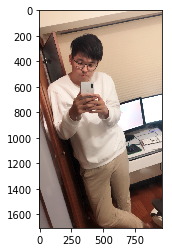

In [4]:
img = cv2.imread(path+'Unknown.png', cv2.IMREAD_UNCHANGED)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

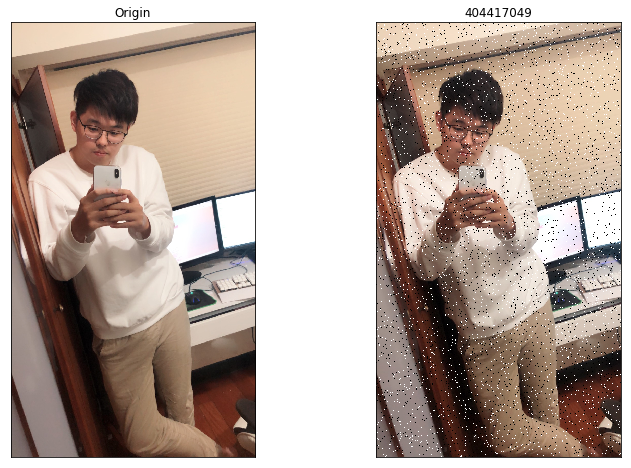

In [5]:
import random
img = cv2.imread(path+'Unknown.png',1)
input = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
output = np.zeros(input.shape,np.uint8)
p = 0.05 # probablity of noise
for i in range (input.shape[0]):
  for j in range(input.shape[1]):
    r = random.random()
    if r < p/2:
      output[i][j] = 0,0,0
    elif r < p:
      output[i][j] = 255,255,255
    else:
      output[i][j] = input[i][j]
  
plt.figure(num='Noise e.g',figsize=(12,8)) #1 inch = 0.39cm
plt.subplot(1,2,1),plt.title('Origin')
plt.imshow(input),plt.xticks([]),plt.yticks([])
plt.subplot(1,2,2),plt.title('404417049')

plt.imshow(output),plt.xticks([]),plt.yticks([])
plt.show()

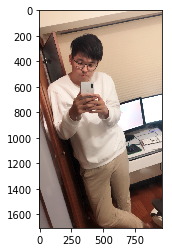

In [6]:
img = cv2.imread(path+'Unknown.png', cv2.IMREAD_UNCHANGED)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [7]:
K = np.ones((3,3), np.uint32)/9
K

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

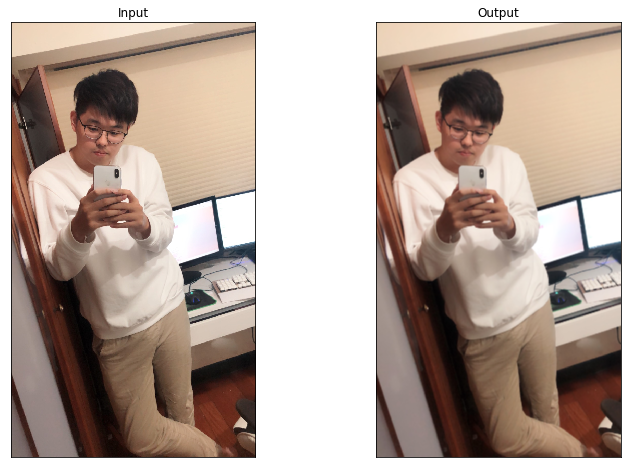

In [8]:
img = cv2.imread(path+'Unknown.png',1)
input = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
output = cv2.filter2D(input,-1,np.ones((7,7),np.float32)/49)# -1 means the same depth as the source
plt.figure(num='2D convolution e.g',figsize=(12,8)) #1 inch = 0.39cm
plt.subplot(121),plt.imshow(input),plt.title('Input')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(output),plt.title('Output')
plt.xticks([]), plt.yticks([])
plt.show()

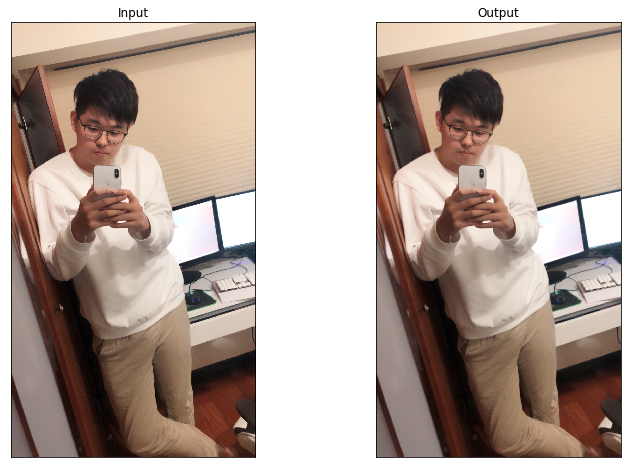

In [9]:
img = cv2.imread(path+'Unknown.png',1)
input = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
output = cv2.boxFilter(input,-1,(3,3),normalize=True)# -1 means the same depth as the source image
plt.figure(num='less smoothing e.g',figsize=(12,8)) #1 inch = 0.39cm
plt.subplot(121),plt.imshow(input),plt.title('Input')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(output),plt.title('Output')
plt.xticks([]), plt.yticks([])
plt.show()

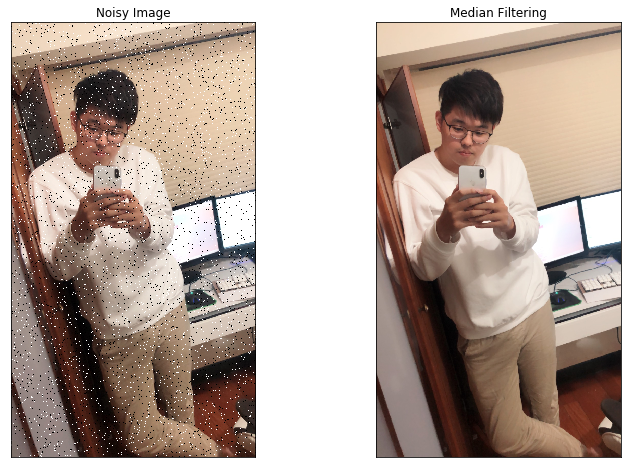

In [10]:
mg = cv2.imread(path+'Unknown.png',1)
input = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
output = np.zeros(input.shape,np.uint8)
p = 0.05 # probablity of noise
for i in range (input.shape[0]):
  for j in range(input.shape[1]):
    r = random.random()
    if r < p/2:
      output[i][j] = 0,0,0
    elif r < p:
      output[i][j] = 255,255,255
    else:
      output[i][j] = input[i][j]
      
noise_removed = cv2.medianBlur(output,3)

plt.figure(num='Medianblur e.g',figsize=(12,8)) #1 inch = 0.39cm
plt.subplot(121),plt.imshow(output),plt.title('Noisy Image')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(noise_removed),plt.title('Median Filtering')
plt.xticks([]), plt.yticks([])
plt.show()

[[0.00310794]
 [0.01474721]
 [0.04950763]
 [0.11758703]
 [0.1975931 ]
 [0.23491418]
 [0.1975931 ]
 [0.11758703]
 [0.04950763]
 [0.01474721]
 [0.00310794]]
(11, 1)


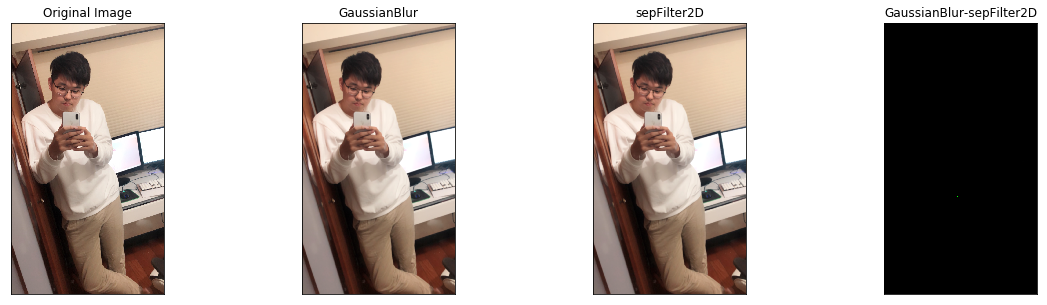

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [11]:
img = cv2.imread(path+'Unknown.png',1)

input = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

kernel = cv2.getGaussianKernel( 11, 1.7 )

print(kernel)

print(kernel.shape)

gBlurImg = cv2.GaussianBlur(input, (11,11), 1.7)

#this is how the GaussianBlur function actually works:
twoD = cv2.sepFilter2D(input, -1, kernel, kernel)
diff = twoD - gBlurImg

plt.figure(num='Filter2d e.g',figsize=(20,5)) #1 inch = 0.39cm
plt.subplot(141),plt.imshow(input),plt.title('Original Image')
plt.xticks([]), plt.yticks([])
plt.subplot(142),plt.imshow(gBlurImg),plt.title('GaussianBlur')
plt.xticks([]), plt.yticks([])
plt.subplot(143),plt.imshow(twoD),plt.title('sepFilter2D')
plt.xticks([]), plt.yticks([])
plt.subplot(144),plt.imshow(diff),plt.title('GaussianBlur-sepFilter2D')
plt.xticks([]), plt.yticks([])
plt.show()
print(diff)

[[0.00310794]
 [0.01474721]
 [0.04950763]
 [0.11758703]
 [0.1975931 ]
 [0.23491418]
 [0.1975931 ]
 [0.11758703]
 [0.04950763]
 [0.01474721]
 [0.00310794]]
(11, 1)


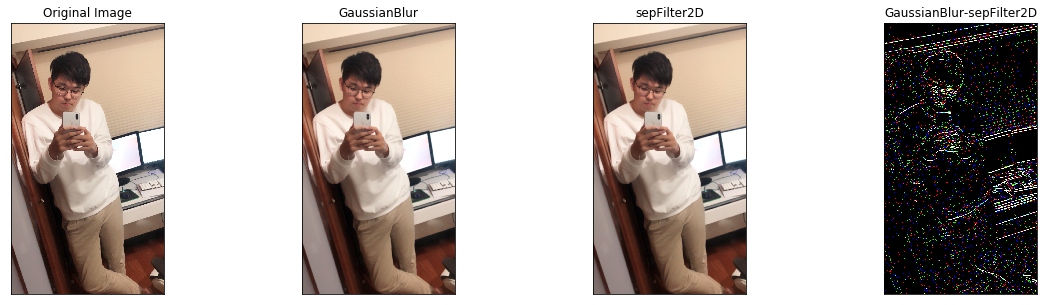

In [12]:
img = cv2.imread(path+'Unknown.png',1)

input = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

kernel = cv2.getGaussianKernel( 11, 1.7 )
kernel2 = cv2.getGaussianKernel( 11, 1.9 )

print(kernel)

print(kernel.shape)

gBlurImg = cv2.GaussianBlur(input, (11,11), 1.7)

#this is how the GaussianBlur function actually works:
twoD = cv2.sepFilter2D(input, -1, kernel, kernel2)
diff = twoD - gBlurImg

plt.figure(num='Filter2d e.g',figsize=(20,5)) #1 inch = 0.39cm
plt.subplot(141),plt.imshow(input),plt.title('Original Image')
plt.xticks([]), plt.yticks([])
plt.subplot(142),plt.imshow(gBlurImg),plt.title('GaussianBlur')
plt.xticks([]), plt.yticks([])
plt.subplot(143),plt.imshow(twoD),plt.title('sepFilter2D')
plt.xticks([]), plt.yticks([])
plt.subplot(144),plt.imshow(diff),plt.title('GaussianBlur-sepFilter2D')
plt.xticks([]), plt.yticks([])
plt.show()